In [27]:
#Importing needed libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")#setting grid for all plots

In [28]:
# Loading the dataset:
df1 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA19/CSV/1.0/en')

In [29]:
df1

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02199V02655,Sex,C02757V03327,Education Level,C02542V03077,Inward or Outward Flow,UNIT,VALUE
0,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,45,Higher secondary and below,1,Net migration,Thousand,-9.7
1,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,45,Higher secondary and below,4,Emigrants: All destinations,Thousand,31.6
2,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,45,Higher secondary and below,5,Immigrants: All origins,Thousand,21.9
3,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,65,Post leaving cert,1,Net migration,Thousand,-0.2
4,PEA19,Estimated Migration Aged 15 Years and Over (P...,2009,2009,-,Both sexes,65,Post leaving cert,4,Emigrants: All destinations,Thousand,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...
625,PEA19,Estimated Migration Aged 15 Years and Over (P...,2022,2022,2,Female,98,Not stated,4,Emigrants: All destinations,Thousand,1.3
626,PEA19,Estimated Migration Aged 15 Years and Over (P...,2022,2022,2,Female,98,Not stated,5,Immigrants: All origins,Thousand,3.9
627,PEA19,Estimated Migration Aged 15 Years and Over (P...,2022,2022,2,Female,-6,All persons,1,Net migration,Thousand,32.7
628,PEA19,Estimated Migration Aged 15 Years and Over (P...,2022,2022,2,Female,-6,All persons,4,Emigrants: All destinations,Thousand,22.6


In [30]:
df1_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02757V03327','C02199V02655','C02542V03077','UNIT']
df1.drop(df1_col_drop ,axis=1, inplace=True)

df1 = df1.rename(columns={'Education Level': 'Education_Level','Inward or Outward Flow': 'Inward_or_Outward_Flow'})

df1= df1[(df1['Sex'] == 'Both sexes')  & (df1['Inward_or_Outward_Flow'] == 'Emigrants: All destinations') &
           (df1['Education_Level'] != 'All persons')]
            
            
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 1 to 595
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    56 non-null     int64  
 1   Sex                     56 non-null     object 
 2   Education_Level         56 non-null     object 
 3   Inward_or_Outward_Flow  56 non-null     object 
 4   VALUE                   56 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [31]:
df1

,Year,Sex,Education_Level,Inward_or_Outward_Flow,VALUE
1,2009,Both sexes,Higher secondary and below,Emigrants: All destinations,31.6
4,2009,Both sexes,Post leaving cert,Emigrants: All destinations,6.7
7,2009,Both sexes,Third level,Emigrants: All destinations,24.4
10,2009,Both sexes,Not stated,Emigrants: All destinations,7.0
46,2010,Both sexes,Higher secondary and below,Emigrants: All destinations,26.7
49,2010,Both sexes,Post leaving cert,Emigrants: All destinations,7.1
52,2010,Both sexes,Third level,Emigrants: All destinations,27.9
55,2010,Both sexes,Not stated,Emigrants: All destinations,5.4
91,2011,Both sexes,Higher secondary and below,Emigrants: All destinations,30.1
94,2011,Both sexes,Post leaving cert,Emigrants: All destinations,6.2


In [32]:
df_col_drop = ['Sex']
df1.drop(df_col_drop ,axis=1, inplace=True)

In [33]:
df1

,Year,Education_Level,Inward_or_Outward_Flow,VALUE
1,2009,Higher secondary and below,Emigrants: All destinations,31.6
4,2009,Post leaving cert,Emigrants: All destinations,6.7
7,2009,Third level,Emigrants: All destinations,24.4
10,2009,Not stated,Emigrants: All destinations,7.0
46,2010,Higher secondary and below,Emigrants: All destinations,26.7
49,2010,Post leaving cert,Emigrants: All destinations,7.1
52,2010,Third level,Emigrants: All destinations,27.9
55,2010,Not stated,Emigrants: All destinations,5.4
91,2011,Higher secondary and below,Emigrants: All destinations,30.1
94,2011,Post leaving cert,Emigrants: All destinations,6.2


In [38]:
pivot_df1 = df1.pivot_table(index=['Year'],columns='Education_Level', values='VALUE', aggfunc='sum').reset_index()
pivot_df1.reset_index(inplace=True,drop=True)

In [39]:
pivot_df1

Education_Level,Year,Higher secondary and below,Not stated,Post leaving cert,Third level
0,2009,31.6,7.0,6.7,24.4
1,2010,26.7,5.4,7.1,27.9
2,2011,30.1,3.3,6.2,35.8
3,2012,28.2,4.3,6.0,34.9
4,2013,32.2,2.5,5.7,29.9
5,2014,23.5,5.7,5.4,30.1
6,2015,20.1,4.2,3.3,31.0
7,2016,20.0,6.8,3.6,25.5
8,2017,20.2,6.1,2.4,27.9
9,2018,12.8,6.6,4.0,26.5


In [42]:

# Adding column
pivot_df1['Inward_or_Outward_Flow'] = 'Emigrants: All destinations' 


<Axes: xlabel='Education_Level', ylabel='Education_Level'>

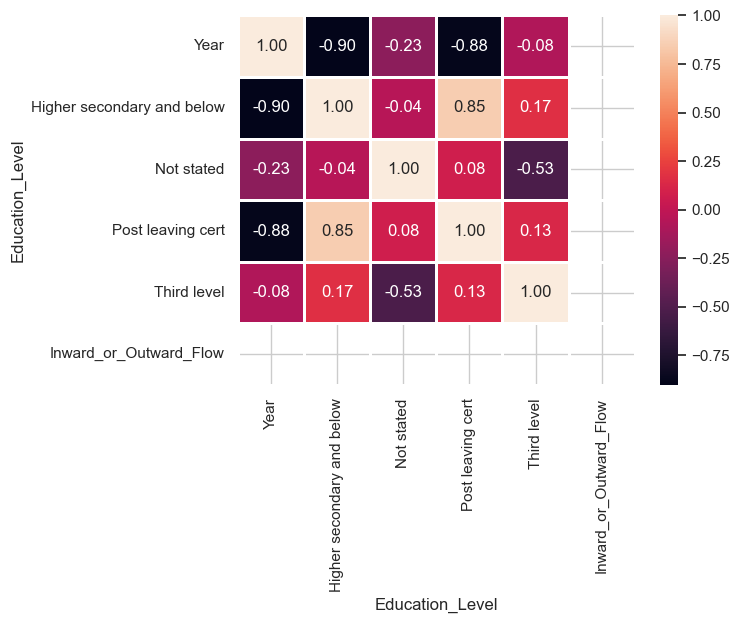

In [44]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'species' column
pivot_df1['Inward_or_Outward_Flow']= label_encoder.fit_transform(pivot_df1['Inward_or_Outward_Flow'])


# Now you can use the heatmap function
import seaborn as sns
sns.heatmap(pivot_df1.corr(), annot=True, fmt='.2f', linewidths=2)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


# Split the dataset into features and target variable
X = pivot_df1[['Inward_or_Outward_Flow']]
y1 = pivot_df1['Higher secondary and below']
y2 = pivot_df1['Not stated']
y3 = pivot_df1['Post leaving cert']
y4 = pivot_df1['Third level']
y5 = pivot_df1['Year']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.4, random_state=60)

# Train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


# Train a random forest regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Train a K-nearest neighbors model
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)


# Make predictions
y_pred_lr = linear_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print the mean squared errors
print(f"Linear Regression MSE: {mse_lr}")
print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"K-nearest Neighbors MSE: {mse_knn}")




Linear Regression MSE: 80.04645833333336
Random Forest Regressor MSE: 78.61568558333337
K-nearest Neighbors MSE: 62.860733333333364


In [13]:
X

Education_Level,Year
0,2009
1,2010
2,2011
3,2012
4,2013
5,2014
6,2015
7,2016
8,2017
9,2018


# Changing Random_State gives great results

In [14]:
# Loading the dataset:
df2 = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA18/CSV/1.0/en')

In [15]:
df2_col_drop = ['STATISTIC','STATISTIC Label','TLIST(A1)','C02719V03286','C02199V02655','C02542V03077','UNIT']
df2.drop(df2_col_drop ,axis=1, inplace=True) 

df2 = df2.rename(columns={'Origin or Destination': 'Origin_or_Destination'})


df2['VALUE'] = df2['VALUE'].apply(lambda x: x * 1000)

df2 = df2[~((df2['Sex'] != 'Both sexes')  | (df2['Origin_or_Destination'] == 'Net migration')
            | (df2['Country'] == 'All countries'))]
df2.info()

df2['Country'] = df2['Country'].str.replace('EU15 to EU27 \(accession countries joined post 2004\)', 'EU15 to EU27 (membership after 2004)', regex=True)


<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 1 to 2657
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   518 non-null    int64  
 1   Country                518 non-null    object 
 2   Sex                    518 non-null    object 
 3   Origin_or_Destination  518 non-null    object 
 4   VALUE                  398 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.3+ KB


In [16]:
df2

,Year,Country,Sex,Origin_or_Destination,VALUE
1,1987,United Kingdom (1),Both sexes,Emigrants: All destinations,21800.0
2,1987,United Kingdom (1),Both sexes,Immigrants: All origins,8100.0
10,1987,United States,Both sexes,Emigrants: All destinations,9900.0
11,1987,United States,Both sexes,Immigrants: All origins,3000.0
19,1987,Canada,Both sexes,Emigrants: All destinations,NaN
...,...,...,...,...,...
2630,2023,Other countries (23),Both sexes,Immigrants: All origins,75800.0
2647,2023,EU14 excl Irl (UK & Ireland),Both sexes,Emigrants: All destinations,13900.0
2648,2023,EU14 excl Irl (UK & Ireland),Both sexes,Immigrants: All origins,17700.0
2656,2023,EU15 to EU27 (membership after 2004),Both sexes,Emigrants: All destinations,8800.0


In [17]:
df2 = df2[~((df2['Origin_or_Destination'] != 'Emigrants: All destinations'))] 
df2_col_drop = ['Sex','Origin_or_Destination']
df2.drop(df2_col_drop ,axis=1, inplace=True) 

In [18]:
df2

,Year,Country,VALUE
1,1987,United Kingdom (1),21800.0
10,1987,United States,9900.0
19,1987,Canada,NaN
28,1987,Australia,NaN
37,1987,Other countries (23),5400.0
...,...,...,...
2611,2023,Canada,5300.0
2620,2023,Australia,4700.0
2629,2023,Other countries (23),11700.0
2647,2023,EU14 excl Irl (UK & Ireland),13900.0


In [19]:
pivot_df2 = df2.pivot_table(index=['Year'],columns='Country', values='VALUE', aggfunc='sum').reset_index()
pivot_df2.reset_index(inplace=True,drop=True)

<Axes: xlabel='Country', ylabel='Country'>

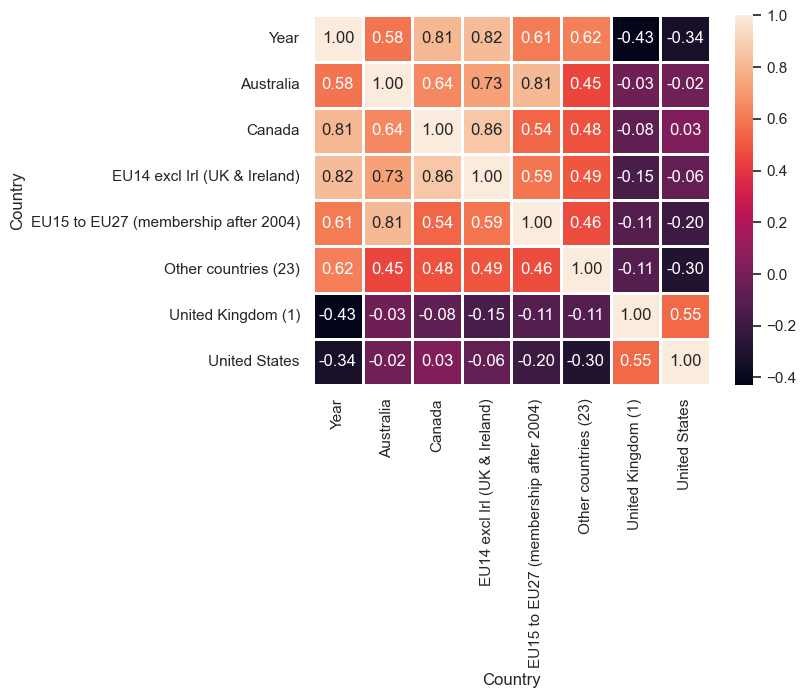

In [20]:
from sklearn.preprocessing import LabelEncoder

# Now you can use the heatmap function
import seaborn as sns
sns.heatmap(pivot_df2.corr(), annot=True, fmt='.2f', linewidths=2)


array([[1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
        1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
        2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
        2020, 2021, 2022, 2023]], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


# Split the dataset into features and target variable
X = pivot_df2['Year'].values.reshape(-1, 1)
y1 = pivot_df2['United Kingdom (1)']
y2 = pivot_df2['United States']
y3 = pivot_df2['Canada']
y4 = pivot_df2['Australia']
y5 = pivot_df2['Other countries (23)']
y6 = pivot_df2['EU14 excl Irl (UK & Ireland)']
y7 = pivot_df2['EU15 to EU27 (membership after 2004)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=0)

# Train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


# Train a random forest regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Train a K-nearest neighbors model
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)


# Make predictions
y_pred_lr = linear_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Print the mean squared errors
print(f"Linear Regression MSE: {mse_lr}")
print(f"Random Forest Regressor MSE: {mse_rf}")
print(f"K-nearest Neighbors MSE: {mse_knn}")


Linear Regression MSE: 88892784.60433677
Random Forest Regressor MSE: 15543759.583333334
K-nearest Neighbors MSE: 40964266.666666664


In [ ]:
pivot_df2